# G.G, Good Game! Investigating the Structural Characteristics that Make Highly-Rated Video Games

# Notebook 5 - Findings and Insights


&nbsp;

**By: [Lae Rivera](https://github.com/laerivera)**

**BrainStation Data Science**

**April 4, 2022**

In this notebook, I have finished my modeling and will now want to focus on gaining useful and actionable insights that I can apply to the project.

***

## Notebook Contents

1. [**Loading Dependencies**](#e1)<br>
    1.1 [Tokenizer Dependency](#e1.1)<br>
    1.2 [Variables Dependency](#e1.2)<br>
    
2. [**Model Evaluation**](#e2)<br>

3. [**Logistic Regression: Count Vectorizer**](#e3)<br>
    3.1 [Extract Features](#e3.1)<br>
    3.2 [Extract Coefficients](#e3.2)<br>
    
4. [**Logistic Regression: TF-IDF Vectorizer/GridSearch 5**](#e4)<br>
    4.1 [Extract Features](#e4.1)<br>
    4.2 [Extract Coefficients](#e4.2)<br>

5. [**Findings and Actionable Insights**](#e5)<br>
    4.1 [Actionable Insights](#e5.1)<br>
    4.2 [The Next Steps](#e5.2)<br>


***

**Importing Libraries**

In [1]:
# Importing libraries

# Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# NLP 
import nltk
import string
import scipy.sparse

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

# Metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

# Dummy 
from sklearn.dummy import DummyClassifier

# Models
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

***

# Loading Dependencies <a id="e1"></a>

Before I can load the pickle files, I need to run the series of code blocks that the data is dependent on for continuity.

**Loading Data**

[Load DF Pickle](https://www.codegrepper.com/code-examples/python/python+save+dataframe+to+pkl)

In [2]:
# Load data
games = joblib.load('data/games.pkl')
games_clean = joblib.load('data/games_clean.pkl')

## Tokenizer Dependency <a id="e1.1"></a>

**Stemming**

Before I fit the model, I will be calling a stemming function from Porter Stemer (nltk). This will cut off word-ends to lower the word to its basic root. We will be adding this process to the "tokenizer" parameter of the vectorizers.

In [3]:
# importing stemmer
stemmer = nltk.stem.PorterStemmer()

**Removing Punctuation**

This returns a list of common punctuations. We will include this into the tokenizer. We want to remove these as it does not really serve significant value to our predicted score. 

In [4]:
# import string & lists punctuations
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


This returns a list of the most common punctuations. This is to show me what types will be removed.

**Stopwords**

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords

ENGLISH_STOP_WORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laerivera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print("List of English Stop Words:")
print(ENGLISH_STOP_WORDS)

List of English Stop Words:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'o

---

**Final Tokenizer**

This tokenizer will be included during vectorization that will run my steps accordingly: remove punctuation, set letters to lowercase, split the sentences into words, remove stop words, stem the words.

In [7]:
 def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

## Variables Dependency <a id="e1.2"></a>

**Create Dataframe Copy**

In [8]:
# Create a copy of the clean dataframe
games_2 = games_clean.copy()

In [9]:
# Keeping the columns I need only
games_2 = games_2.drop(columns=['name', 'release_year', 'release_month']) # drop columns I won't need

Recall: I am only adding 'Platform', 'User Review, and 'Game of the Year' as added features.

**Defining Variables**

In [10]:
# Define X and y
X2 = games_2.drop(columns=['meta_score']) # X with new features added
y2 = games_2['meta_score'] # target

**Train/Test Split**

In [11]:
# Setting test size to 20%, and training at 80%
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.20, random_state=1) # same random state

## Helper Function

Due to the long execution times, I will use a customized helper function by [Andrew Dang](https://github.com/andrew-dang) to reduce running models when it is already saved in a `.pkl` file.

In [12]:
def load_fitted_models():
    '''
    Function that loads fitted models and sets the model_loaded_flag to True. 
    Saves readers the trouble of having to fit all the models every time they open the notebook.
    
    INPUT:
    ------
    None
    
    OUTPUT:
    -------
    model_dict: a dictionary that contain fitted models
    models_loaded_flag: A boolean. If set to True, most models in the notebook will not undergo 
                        fitting, and load models from the dictionary instead.

    '''
    
    model_dict = {} # Filling in dictionary with models
    model_dict['gs5'] = joblib.load('data/fitted_gridsearchcv5.pkl')
    
    models_loaded_flag = True # set to false if re-executing the training of models
    return model_dict, models_loaded_flag


In [13]:
# Load the fitted models
model_dict, models_loaded_flag = load_fitted_models()

**Loading After Dependencies**

In [14]:
# Load data 
gs4 = joblib.load('data/fitted_gridsearchcv4.pkl' ) #gridsearch 4 results
gs5 = joblib.load('data/fitted_gridsearchcv5.pkl' ) #gridsearch5 results
gs_full_df = joblib.load('data/gs_full_df.pkl') # load


***

# Model Evaluation <a id="e2"></a>

In [15]:
gs_full_df

,Title,Best_Estimator,Best_Train_Score,Best_Test_Score
0,Dummy,Dummy Classifier,,51.07
1,GRIDSEARCH 1,"(TfidfVectorizer(min_df=5, tokenizer=<function...",95.69,71.23
2,GRIDSEARCH 2,"(CountVectorizer(min_df=5, tokenizer=<function...",91.65,68.81
3,GRIDSEARCH 3,(ColumnTransformer(transformers=[('platform_tr...,96.58,69.52
4,GRIDSEARCH 4,(ColumnTransformer(transformers=[('platform_tr...,96.58,69.52


Typically, a confusion matrix along with the F1, precision, and recall scores will be assessed. However, since my data is fairly balanced, accuracy is the best performance metric to use (as explained earlier). 

Here we can see that all models did significantly better than the dummy classifier, which returned a test score of 51%. *All models scored above this threshold set*; all of them scored roughly ~20% higher than the dummy. This suggests that my optimal models from the gridsearch did way better than just random guessing, and suggests the models learned quite well. 

On the downside, there is a substantial amount of overfitting happening despite regularization, cross validation, and hyperparameter tuning being performed, which suggests the data has a lot of noise present, which disrupts the learning process. Essentially, this alludes to the model having trouble generalizing to unseen data, which negatively affects its predictive capabilities. One possible explanation is that there are different tokens that were on the training side, and not on the test side, thus the introduction of these words is difficult for the model to interpret and classify during testing. The remedy to this is further pre-processing and cleaning——a task that may be done in future iterations of this project.

Overall, despite the large amounts of overfitting, I can argue that a ~70% test score is *still* quite **usable** and sufficient enough in this specific application. In other words, this model can still be usable, despite not being quite "optimal", even if steps to achieve optimal results were undertaken.



*Note*:It's worth noting that cross validation scores were around the same range as test scores. Maybe off by just a few percentage points (1-2%).

***

# Logisitic Regression Count Vectorizer <a id="e3"></a>

Since the most optimal model was a Logistic Regression, I can then begin to gather insights. I can do this by looking at the coefficients of model that contribute towards whether a game is rated low or high. The plan is to gather the features and coefficients and find the most significant contributors to a high or low meta score.

**Workflow**:
- Extract Features
- Clean Features
- Extract Coefficients
- Pair Features and Coefficients
- Plot Features and Coefficients
***

### Extract Features <a id="e3.1"></a>

Here, I plan on calling on the GridSearchCV 4's best estimator then acquiring the feature names from the named step 'transformer'. Since I added the vectorizers and one hot encoder in the 'tranformer' portion of the pipeline(via ColumnTransformer()), I can call on the steps/attributes of the pipeline and extract my data from that.

In [16]:
# Extract Feature Names
gs4_features = gs4.best_estimator_.named_steps['transformer'].get_feature_names() # get features of vectorizer passed through the column transformer

In [17]:
# Count number of features
len(gs4_features) 

9422

In [18]:
type(gs4_features)

list

I currently have 9,422 features after the column transformer.

***

**Random Sample**

I want to check a select number of random columns from the list of features I just extracted. This will be done to see if further cleaning will be needed.

In [19]:
# Random Sample from feature list
random_index = random.randint(0,len(gs4_features)-1)
random_list_features = list(random.choices(gs4_features, k=10))
random_list_features

['summary_transform__jak',
 'summary_transform__persona',
 'summary_transform__smith',
 'summary_transform__they’r',
 'summary_transform__triad',
 'summary_transform__employ',
 'summary_transform__flower',
 'summary_transform__eager',
 'summary_transform__coin',
 'summary_transform__super']

Looks good. One thing to note about the features is that since I did a `.named_steps` function before `get_feature_names()`, this would **include the prefix of the transformers** as well as the **prefix of the column that was transformed**. Although this helps me keep track of the extraction process, this makes the readability of feature names quite difficult. 

I will then preform some feature name cleaning. Essentially, I want to find the instance of a "__" and take the value on the right of it. This will leave me with the clean token names.

***

**Cleaning Feature Names**

I am going to do a loop that splits the string from the '__', and appends the word into an empty 'token' list.

In [20]:
# Clean up feature names 
tokens = []
for feature in gs4_features:
    tokens.append(feature.split('__')[1])  # Loop that splits by the double dashed line adds it and adds it an empty token list

**Cleaned Random Sample**

In [21]:
# Random Sample from feature list
random_index2 = random.randint(0,len(tokens)-1)
random_list_features2 = list(random.choices(tokens, k=10)) # 10 random tokens from the list
random_list_features2

['interfac',
 'fourplay',
 'sandman',
 'cargo',
 'rebel',
 'sunlight',
 'crossplay',
 'public',
 'workplac',
 'anonym']

Now the tokens are clean and without the prefix! This process greatly improved readability and analysis.

***

### Extract Coefficients <a id="e3.2"></a>

**Get Coefficients**

To obtain the coefficients, I will be using `.named_steps['model']`. This allows me to access the best estimator's 'model' attribute, and since it is a Logsitic Regression, I can extract the coefficients.

In [22]:
# Extract coefficients from best estimator
coefs4 = gs4.best_estimator_.named_steps['model'].coef_.flatten() 
coefs4 # view array

array([-0.80171013, -0.58114836,  1.70020414, ..., -0.44016533,
       -0.71052608, -2.8069054 ])

**Pair Features and Coefficients**

In [23]:
features_and_coefs4 = pd.DataFrame({'Features': tokens, 'Coef': coefs4}) #setting up the columns and what should contain it
features_and_coefs4.head()

,Features,Coef
0,x0_ 3DS,-0.801710
1,x0_ DS,-0.581148
2,x0_ Dreamcast,1.700204
3,x0_ Game Boy Advance,-1.037426
4,x0_ GameCube,-0.131704


In [24]:
# Obtain top n words
top_words = features_and_coefs4.sort_values('Coef', ascending=False).head(30)
bot_words = features_and_coefs4.sort_values('Coef', ascending=True).head(30)

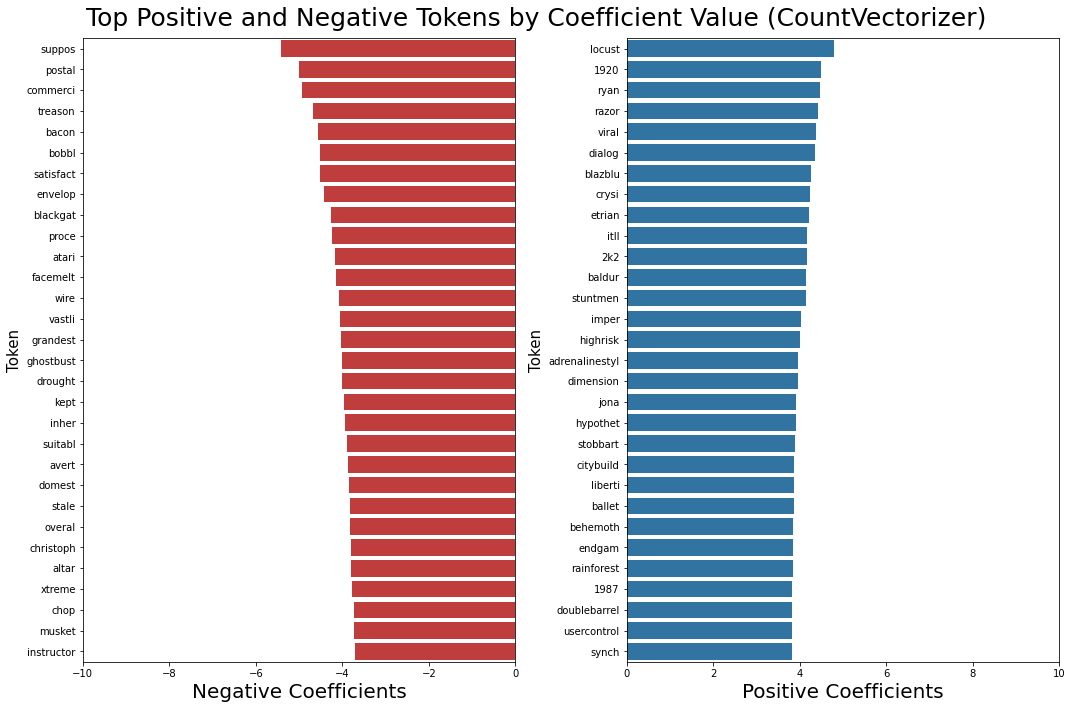

In [25]:
# plot top and bottom n words
 
plt.subplots(1,2, figsize=(15,10)) #subplot
plt.suptitle('Top Positive and Negative Tokens by Coefficient Value (CountVectorizer)', fontsize=25)

# Subplot 1
plt.subplot(1,2,1) # subplot position
sns.barplot(x=bot_words['Coef'], 
            y=bot_words['Features'], 
            color='tab:red' )
plt.xlim([-10,0]) #sets limit on coefficients
plt.xlabel('Negative Coefficients', fontsize=20)
plt.ylabel('Token', fontsize=15)

# Subplot 2
plt.subplot(1,2,2) # subplot position
sns.barplot(x=top_words['Coef'], 
            y=top_words['Features'],
            color='tab:blue')
plt.xlim([0,10]) # sets limit on coefficients
plt.xlabel('Positive Coefficients', fontsize=20)
plt.ylabel('Token', fontsize=15)


plt.tight_layout() #fixes the format
plt.savefig('data/topcv.jpg')

plt.show()


### Count Vectorizer Results

There are some patterns I noticed based on the *Top Positive and Negative Tokens by Coefficient Value (CountVectorizer)* plot. These are some of the structural characteristics of the games with important contributing tokens:

**Platform**:
- Negative: *atari*

**Character Names**: 
- Positive: *jona*, *stobbart*, *etrian*, *ryan* 
- Negative: *christoph*
    
**Weaponry**: 
- Positive: *doublebarrel*, *razor*
- Negative:  *musket* 

**Landscape and Environment**:
- Positive: *rainforest*, *viral*, *locust*, *1920*, *1987*, *2k2*
- Negative: *stale*, *drought*

**Graphics and Play Style**:
- Positive: *synch*, *dimension*, *adrenalinestyle*, *usercontrol*, *citybuild*, *highrisk*
- Negative: *xtreme*, *bobbl*

**Theme**:
- Positive: *ballet*, *stuntmen*, *dialogue*
- Negative: *ghosttbust*, *treason*


With these themes, I can clearly see that there are tokens that describe a certain genre of games. Some of these themes include games that are set in certains periods of time, during a disaster of some kind, or even at a specific biome. 

**Source Material**:[Structural Characteristics of Video Games](https://pubmed.ncbi.nlm.nih.gov/15006163/)

***

# Logistic Regression TF-IDF <a id="e4"></a>

I want to take advantage of TF-IDF to take words used more frequently and places a larger significance on those words. On the contrary, TF-IDF places less significance on words used more frequently across all documents. I am fitting this on a GridSearch to ensure 5-fold cross validation happens and I can easily see the results and standard deviation of the cross validation score.

**GridSearch 5**:

In [26]:
if models_loaded_flag: 
    print('Loading pre-trained model...')
    gs5 = model_dict['gs5'] # reference the pkl
    
    # Print the best estimator
    print('\nThe best model used the following settings:', '\n',gs5.best_estimator_)
    
    # Print score 
    print(f"Best Model Train Score (%): {round(gs5.score(X_train_2, y_train_2)*100.00, 2)}")
    print(f"Best Model Test Score (%): {round(gs5.score(X_test_2, y_test_2)*100.00,2)}")
    
#------------------------------------------------------------------------------------------------------------------#
    
else:
    # State Models will re-train
    print("Training Models...")
    
    # GRIDSEARCH 5:

    estimators5 = [('transformer', ColumnTransformer([])),
                ('model', LogisticRegression())]


    pipe5 = Pipeline(estimators5)

    # Instantiate Pipeline with the specified steps
    param_grid5= [

    # Logistic Classifier with new Features
                {'transformer': [ColumnTransformer([('platform_transform', OneHotEncoder(), ['platform']),
                    ('summary_transform', TfidfVectorizer(min_df=5, tokenizer=my_tokenizer), 'summary')])],
                'model': [LogisticRegression()],
                'model__C': [10], # More C values
                'model__penalty': ['l2'],
                'model__max_iter': [10000],
                'model__random_state': [1]}
                     ]

    # Instate cross-validated grid search object
    grid5 = GridSearchCV(
        estimator = pipe5,
        param_grid = param_grid5,
        cv = 5, # cross validation folds
        verbose = 0,
        n_jobs = -1
    )

    # fit the grid 
    fitted_grid5 = grid5.fit(X_train_2, y_train_2)
    
#------------------------------------------------------------------------------------------------------------------# 

# # Saving GridSearch 5 as a pickle file
   
    joblib.dump(fitted_grid5, 'fitted_gridsearchcv5.pkl')
    # Setting variable
    gs5 = joblib.load('fitted_gridsearchcv5.pkl' ) # NOTE: Unusual, but doing the loading first before calling best estimator/scores since run times are quicker for me
    
    
    # Best Estimator of GridSearch
    print(gs5.best_estimator_)
    
    # Print Score
    print(f"Best Model Train Score (%): {round(gs5.score(X_train_2, y_train_2)*100.00, 2)}")
    print(f"Best Model Test Score (%): {round(gs5.score(X_test_2, y_test_2)*100.00,2)}")

Loading pre-trained model...

The best model used the following settings: 
 Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('platform_transform',
                                                  OneHotEncoder(),
                                                  ['platform']),
                                                 ('summary_transform',
                                                  TfidfVectorizer(min_df=5,
                                                                  tokenizer=<function my_tokenizer at 0x7fbb68b60550>),
                                                  'summary')])),
                ('model',
                 LogisticRegression(C=10, max_iter=10000, random_state=1))])
Best Model Train Score (%): 89.4
Best Model Test Score (%): 69.29


In [27]:
gs5_results = pd.DataFrame(gs5.cv_results_).sort_values('mean_test_score', ascending=False)
gs5_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__max_iter,param_model__penalty,param_model__random_state,param_transformer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,24.720954,1.345795,4.969413,0.650124,"LogisticRegression(C=10, max_iter=10000, rando...",10,10000,l2,1,ColumnTransformer(transformers=[('platform_tra...,"{'model': LogisticRegression(C=10, max_iter=10...",0.668073,0.686709,0.668073,0.656821,0.688819,0.673699,0.012215,1


***

#### Extract Features TF-IDF <a id="e4.1"></a>

In [28]:
# Extract Feature Names
gs5_features = gs5.best_estimator_.named_steps['transformer'].get_feature_names()

In [29]:
# Count number of features
len(gs5_features)

9422

I currently have 9,422 features. 

In [30]:
# Random Sample from feature list
random_index_t = random.randint(0,len(gs5_features)-1)
random_list_features_t = list(random.choices(gs5_features, k=10))
random_list_features_t

#Source: https://www.w3schools.com/python/ref_random_choices.asp

['summary_transform__bethesda',
 'summary_transform__swedish',
 'summary_transform__disabl',
 'summary_transform__reject',
 'summary_transform__swear',
 'summary_transform__inmat',
 'summary_transform__unrestrain',
 'summary_transform__resourc',
 'summary_transform__kidnapp',
 'summary_transform__feder']

One thing to note about the features is that since I did a `.named_steps` function before `get_feature_names()`, this would include the prefix of the transformers as well as the column that was transformed. This makes the feature names quite messy. I will then preform some feature name cleaning. Essentially, I want to find the instance of a "__" and take the value on the right of it. This will leave me with the clean token names

In [31]:
# Clean up feature names 
tokenst = []
for feature in gs5_features:
    tokenst.append(feature.split('__')[1]) 

In [32]:
# Random Sample from feature list
random_indext2 = random.randint(0,len(tokenst)-1)
random_list_featurest2 = list(random.choices(tokenst, k=10))
random_list_featurest2

['prowess',
 'raincoat',
 'corneliu',
 'signatur',
 'larg',
 'rig',
 'minist',
 'hord',
 'cosmet',
 'systemat']

Now the tokens are clean and without the prefix! 

#### Extract Coefficients IF-IDF <a id="e4.2"></a>

In [33]:
coefs5 = gs5.best_estimator_.named_steps["model"].coef_.flatten()

In [34]:
coefs5

array([-0.30711534, -0.53723979,  1.06700068, ..., -1.51167636,
       -0.26569918, -2.52748182])

In [35]:
features_and_coefs5 = pd.DataFrame({'Features': tokenst, 'Coef': coefs5})

In [36]:
features_and_coefs5.head()

,Features,Coef
0,x0_ 3DS,-0.307115
1,x0_ DS,-0.537240
2,x0_ Dreamcast,1.067001
3,x0_ Game Boy Advance,-0.315202
4,x0_ GameCube,-0.230336


In [37]:
# Obtain top n words
top_wordst = features_and_coefs5.sort_values('Coef', ascending=False).head(30)
bot_wordst = features_and_coefs5.sort_values('Coef', ascending=True).head(30)

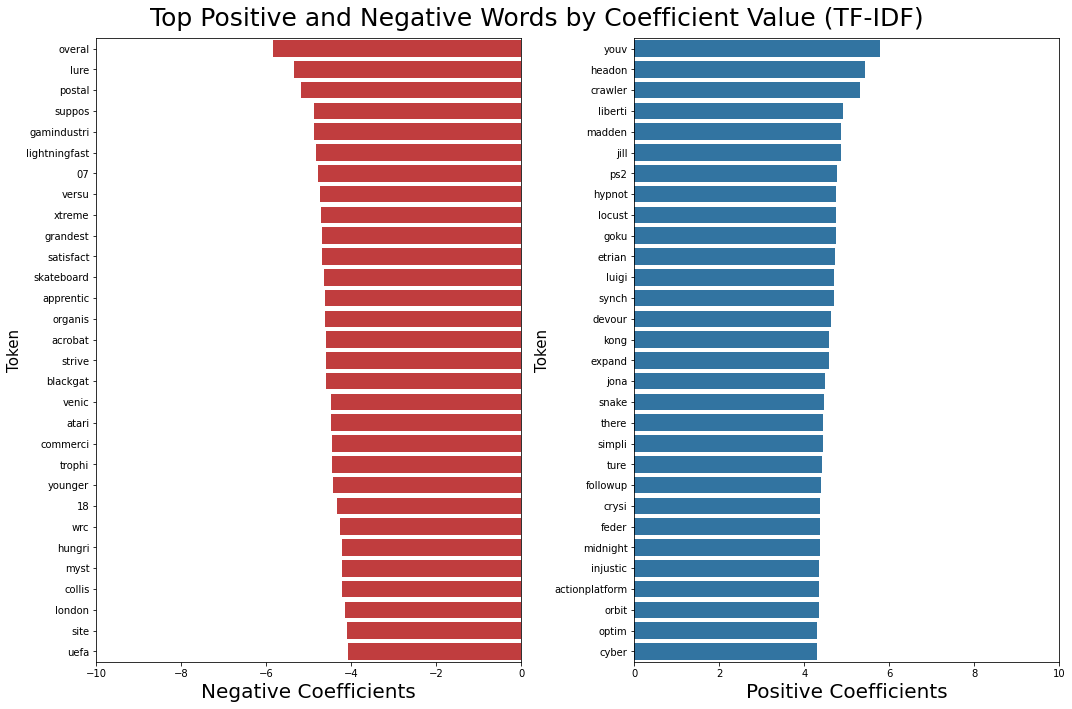

In [38]:
# plot top and bottom n words
plt.subplots(1,2, figsize=(15,10)) #subplot
plt.suptitle('Top Positive and Negative Words by Coefficient Value (TF-IDF)', fontsize=25)

# Subplot 1
plt.subplot(1,2,1) # subplot position
sns.barplot(x=bot_wordst['Coef'], 
            y=bot_wordst['Features'], 
            color='tab:red' )
plt.xlim([-10,0]) #sets limit on coefficients
plt.xlabel('Negative Coefficients', fontsize=20)
plt.ylabel('Token', fontsize=15)

# Subplot 2
plt.subplot(1,2,2) # subplot position
sns.barplot(x=top_wordst['Coef'], 
            y=top_wordst['Features'],
            color='tab:blue')
plt.xlim([0,10]) # sets limit on coefficients
plt.xlabel('Positive Coefficients', fontsize=20)
plt.ylabel('Token', fontsize=15)


plt.tight_layout()
plt.savefig('data/toptfidf.jpg')
plt.show()

I will segregate the tokens into discernable patterns I found:
    
**Platform**:
- Positive: *ps2*
- Negative: *atari*

**Character Names**: 
- Positive: *jona*, *kong*, *luigi*, *etrian*, *jill*, *goku*

**Landscape and Environment**:
- Positive: *orbit*, *midnight*
- Negative: *london*, *venice*, *07*, *gameindustry*

**Graphics and Play Style**:
- Positive: *actionplatform*, *followup*, *expand*
- Negative: *xtreme*, *versu*, *lightning fast*

**Theme**:
- Positive: *cyber*, *injustice*, *crysi*, *ture*, *synch*, *madden*, *liberti*, 
- Negative: *uefa*, *wrc*, *younger*, *strive*, *acrobat*, *skateboard*, *trophi*

***

# Accumulate Findings

With the themes organized, I can now combine the two findings into a compiled list. I will be creating a dataframe for easy readability.

In [39]:
# Create list 
patterns_results = [['Platform', 'ps2', 'atari'],
                    ['Character Names', 'jona, kong, luigi, etrian, jill, stobbart, ryan, goku', 'christoph'],
                    ['Weaponry', 'doublebarrel, razor','musket'],
                    ['Landscape and Environment', 'orbit, midnight, rainforest, viral, locust, 1920, 1987, 2k2', 'london, venice, 07, gameindustry, stale, drought'],
                    ['Graphics and Play Style','actionplatform, followup, expand, synch, dimension, adrenalinestyle, usercontrol, citybuild, highrisk','xtreme, versu, lightningfast, bobbl'],
                    ['Theme', 'cyber, injustice, crysi, ture, synch, madden, liberti, ballet, stuntment, dialogue','uefa, wrc, younger, strive, acrobat, skateboard, trophi, ghostbust']]

# Convert into dataframe and add column names
patterns_results_df = pd.DataFrame(patterns_results, columns = ['Structural Characteristic', 'Positive', 'Negative'])
                    

In [40]:
# View full column width
pd.set_option('display.max_colwidth', None)

***

# Findings and Actionable Insights <a id="e5"></a>

In [41]:
print("Structural Characteristics and Tokens")

patterns_results_df

Structural Characteristics and Tokens


,Structural Characteristic,Positive,Negative
0,Platform,ps2,atari
1,Character Names,"jona, kong, luigi, etrian, jill, stobbart, ryan, goku",christoph
2,Weaponry,"doublebarrel, razor",musket
3,Landscape and Environment,"orbit, midnight, rainforest, viral, locust, 1920, 1987, 2k2","london, venice, 07, gameindustry, stale, drought"
4,Graphics and Play Style,"actionplatform, followup, expand, synch, dimension, adrenalinestyle, usercontrol, citybuild, highrisk","xtreme, versu, lightningfast, bobbl"
5,Theme,"cyber, injustice, crysi, ture, synch, madden, liberti, ballet, stuntment, dialogue","uefa, wrc, younger, strive, acrobat, skateboard, trophi, ghostbust"


Platforms: PS2, Atari ==> older platforms have a impact on 
Sports/genres: madden, skateboard
characters:
graphics: actionplatform
sequel/franchise: - "sequel"

***

# Actionable Insights <a id="e5.1"></a>


**Platforms may determine score**
- In terms of platforms, a leading positive indicator for a high meta score are games released in the PS2, while games released in Atari are strong negative indicators for a low meta score. However, since these platforms no longer produce new games, it can possibly be associated with simply just historical reviews.

**Don't forget the weapons!**
- It is possible that the weaponry can be related to the time-period or theme of the game. For instance, pirate games tend to have 'muskets', which is their common weapon. Similarly, 'doublebarrel' and 'razors' may allude to a late 1800's time period where these being used as weapons were commonplace.

**2D Graphics and Art Style**
- One improtant finding is that the dimension of the game matters and is indicative of a good meta score. When it comes to design and art, an "action platform and line style instead of thirdperson" type of game are prefered.  Action Platform and Line Style games are basically 2-dimensional style of games where the users move up and down across different 'platforms'. 
- This relates well to higher scores having good 'user control'. A main quality of action platforms is plenty of interaction with the background objects. 


**The type of sport in sport-genre games is significant**
- When creating a sport games (which are an extremely popular genre), some sports tend to score better than others. For example, sports like soccer, race-car racing, gymnastics, and skateboarding seem to be top indicators of a low meta score. On the other hand, sports based on American football (or the NFL), stuntmen, bowling, and ballet get higher scores.

**Some landscapes and environments do better**
- Time set in the 1900s tend to have high reviews and games associated with 07 (possibly 2007), tend to receive lower scores.
- Being set in European countries like London and Venice is associated with a low score.
- Environments set in darker areas like 'orbit, midnight, and rainforests' are associated with high scores.
- In terms of settings, some disaster such as a 'virus spreading' or 'locusts' were some of the stronger indicators for a positive game. Interestingly enough, 'drought' (which pairs with locusts), is an indicator for a low score.


**People like franchises, nostalgia, and continuity**
- The "high" meta score contributors are games that are franchises. These are games that have multiple parts of a series or title——often coming in the form of sequels/prequels. This was observed by looking at the top positive coefficients, where character names such as "Goku", "Luigi", and "Etrian" appear. These names are from some popular franchises: "Dragon Ball-Z", "Super Mario", and "Etrian Odyssey" respectively. Further investigating of the top coefficients also showed that "sequel" was a leading indicator to a high meta score. This seems to allude to the presence of a nostalgic and/or continuity aspect to the high rated game qualities.

**Put effort into the script or voice acting**
- Dialogue is one of the higher indicators of a high meta score.

***

# The Next Steps <a id="e5.2"></a>

Now that we talked about the findings, these are some of the things I want to work on as I venture out to find new ways to make this project better in the future (or if others are up to the challenge to do it themselves!)...

- Lower Overfitting! Lowering the noise and performing more optimization steps may help with overfitting.
- In this project, only a select few of Positive/Negative coefficients were used. Perhaps it would be useful to see a higher number—especially since the coefficients are rather high. It would be good to do some feature-importance as well.
- Using Named Entity Recognition in the analysis to help classify the tokens more accurately. This can help me segregate the characteristics even better (or filter some out).
- Implement a decision tree or random forest analysis to see if those models can provide further insight.
- Apply neural networks to discover deeper patterns in the data and more accurate predictions.
- Apply ensemble learning techniques to improve the model test score overall.

***